In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [8]:
os.listdir()

['.ipynb_checkpoints',
 '2007-2016-homeless-texas.csv',
 '2007-2020-Hosuing Inventory Count-Counts-by-State.xlsx - 2020.csv',
 '2007-2020-Housing Inventory Count-Counts-by-CoC.xlsx - 2020.csv',
 '2007-2020-PIT-Estimates-by-CoC.xlsx - 2020.csv',
 '2007-2020-PIT-Estimates-by-state.xlsx - Change.csv',
 '2021-HIC-by-LHC.xlsx',
 'all_son_2017_tables_current_6_12_17.xlsx - Appendix Table Menu.csv',
 'dataset_apartment_rent_texas.csv',
 'Displacement_and_Gentrification_Recommendation_Inventory.csv',
 'FINAL-2020-HIC-by-LHC.xlsx - Summary.csv',
 'FINAL-2020-HIC-by-LHC.xlsx - Summary.ipynb',
 'Final-HIC-By-LHC-Report-2018.xlsx - HIC Summary.csv',
 'Final-HIC-by-LHC_2019.xlsx - Summary.csv',
 'HIC-Final-Report-8.15.17.xlsx - Summary.csv',
 'HOSUING_cost_burden.xlsx - Sheet1.csv',
 'Needs_met_by_Homeless_Outreach_Street_Team.csv',
 'Readme.md',
 'Strategic_Measure_Number_and_percentage_of_persons_who_successfully_exit_from_homelessness.csv',
 'Strategic_Measure_Number_of_persons_experiencing_home

In [14]:
df = pd.read_csv(r'C:\Users\JAI GURU JI\Documents\GitHub\omdena-texas-homelessness\src\cleaned_datasets\\FINAL-2020-HIC-by-LHC.xlsx - Summary.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\JAI GURU JI\\Documents\\GitHub\\omdena-texas-homelessness\\src\\cleaned_datasets\\FINAL-2020-HIC-by-LHC.xlsx - Summary.csv'

In [12]:
df.head()

,Project Types,Total Year-Round Beds 2019,Total Year-Round Beds 2020,Difference
0,ES,4212.0,4328.0,116.0
1,TH,985.0,847.0,-138.0
2,PSH,977.0,1004.0,27.0
3,RRH,859.0,1137.0,278.0
4,Total,7033.0,7316.0,283.0


Preview of data:


,Project Types,Total Year-Round Beds 2019,Total Year-Round Beds 2020,Difference
0,ES,4212.0,4328.0,116.0
1,TH,985.0,847.0,-138.0
2,PSH,977.0,1004.0,27.0



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Project Types               6 non-null      object 
 1   Total Year-Round Beds 2019  5 non-null      float64
 2   Total Year-Round Beds 2020  5 non-null      float64
 3   Difference                  5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 316.0+ bytes
None

Preview of data with null values:


,Project Types,Total Year-Round Beds 2019,Total Year-Round Beds 2020,Difference
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN


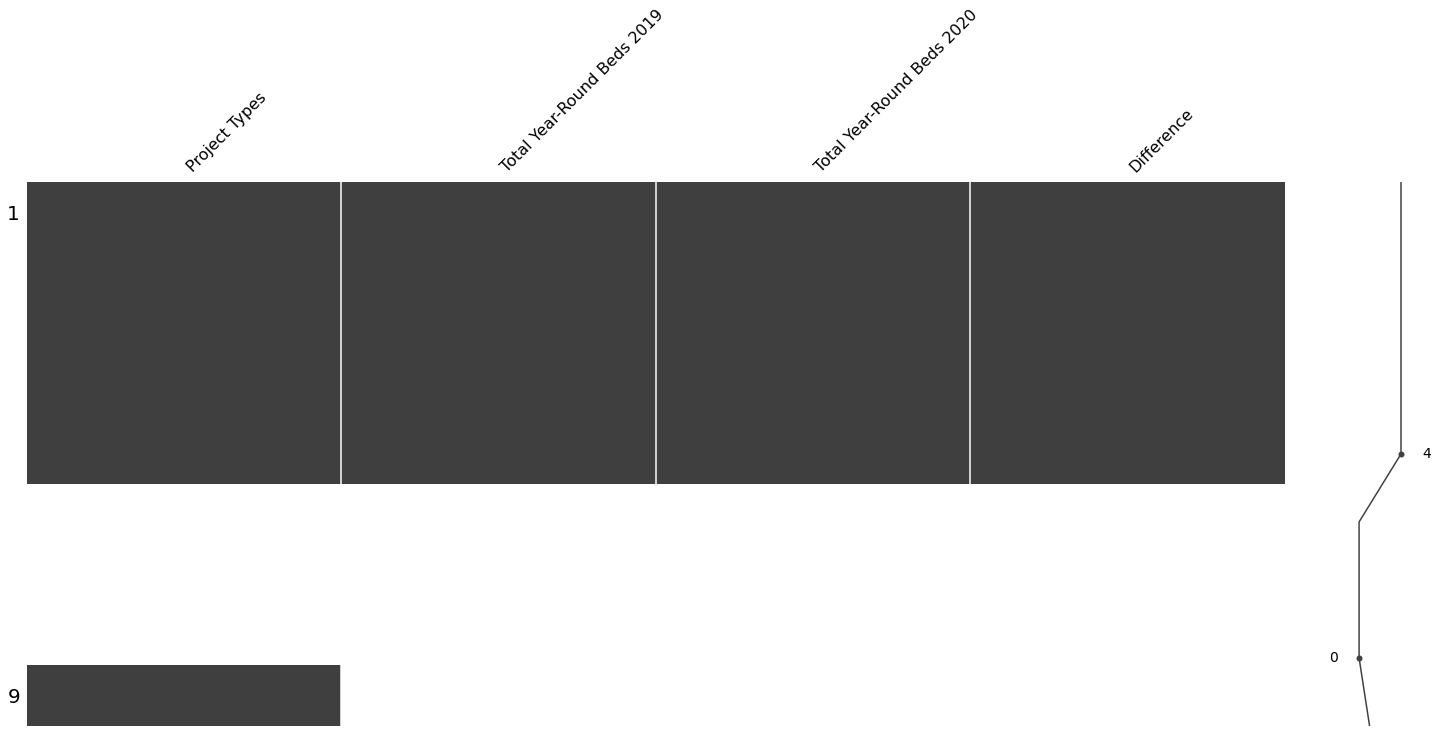


***Number of duplicated entries:  2


,Project Types,Total Year-Round Beds 2019,Total Year-Round Beds 2020,Difference
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN



To check: 
Unique count of non-numeric data

Project Types    6
dtype: int64
Top 5 unique values of Project Types
  Project Types  Count
0            ES      1
1            TH      1
2           PSH      1
3           RRH      1
4         Total      1
 

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Total Year-Round Beds 2019,5.0,2813.2,2752.099053,859.0,977.0,985.0,4212.0,7033.0
Total Year-Round Beds 2020,5.0,2926.4,2848.444716,847.0,1004.0,1137.0,4328.0,7316.0
Difference,5.0,113.2,177.855841,-138.0,27.0,116.0,278.0,283.0


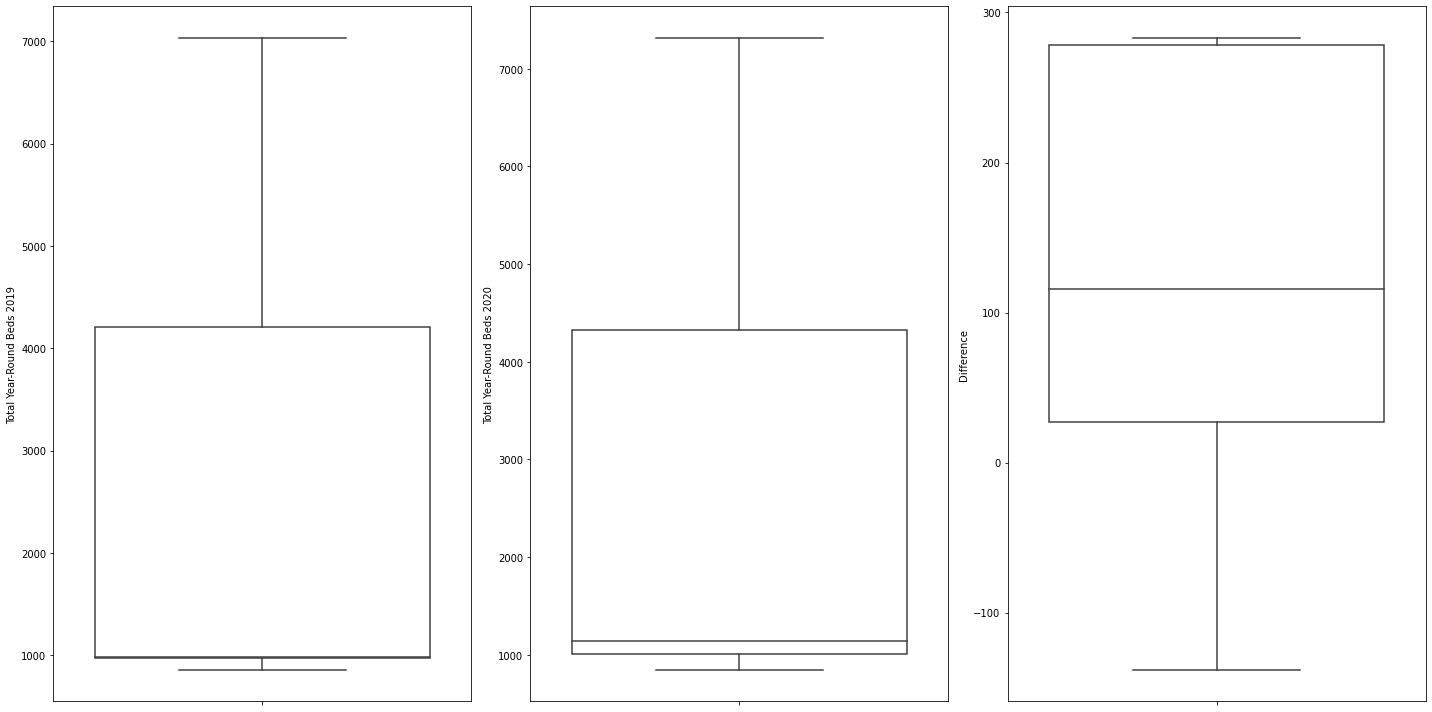


To check pairwise joint distribution of numeric data


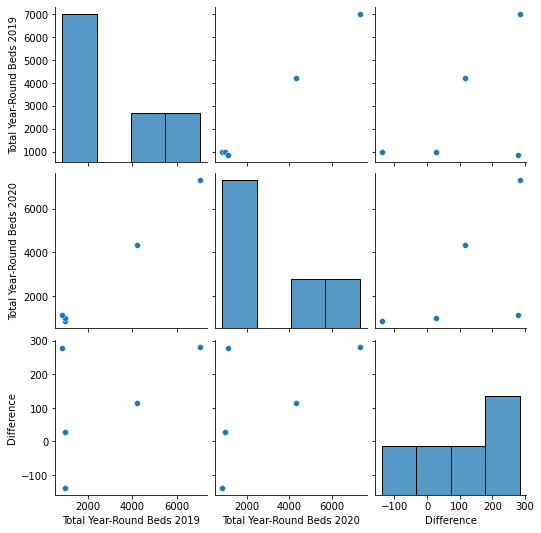


To check time series of numeric data  by daily, monthly and yearly frequency


In [11]:
eda(df)

In [12]:
df.isnull().sum()

Project Types                 3
Total Year-Round Beds 2019    4
Total Year-Round Beds 2020    4
Difference                    4
dtype: int64

In [13]:
df.nunique()

Project Types                 6
Total Year-Round Beds 2019    5
Total Year-Round Beds 2020    5
Difference                    5
dtype: int64

In [ ]:
# The scatter plot indicates that all the points are scattered here and there is no correlation between parameters.
# Thorugh the box plot we can see there are no outliers out there but it's better to check it through Z-score

# Detecting Outliers

In [27]:
# Selecting those columns which are of numeric data types
numeric_col = df.select_dtypes('number').columns

# Creating new dataframe
numeric_df = pd.DataFrame


# Storing numeric datatype columns in our new dataframe
for i in range(len(numeric_col)):
    numeric_df = df.filter(numeric_col,axis=1)
    
numeric_df.head()

,Total Year-Round Beds 2019,Total Year-Round Beds 2020,Difference
0,4212.0,4328.0,116.0
1,985.0,847.0,-138.0
2,977.0,1004.0,27.0
3,859.0,1137.0,278.0
4,7033.0,7316.0,283.0


# Remove Outliers

In [34]:
from scipy import stats

In [33]:
z = np.abs(stats.zscore(numeric_df))
print(z)

   Total Year-Round Beds 2019  Total Year-Round Beds 2020  Difference
0                         NaN                         NaN         NaN
1                         NaN                         NaN         NaN
2                         NaN                         NaN         NaN
3                         NaN                         NaN         NaN
4                         NaN                         NaN         NaN
5                         NaN                         NaN         NaN
6                         NaN                         NaN         NaN
7                         NaN                         NaN         NaN
8                         NaN                         NaN         NaN


In [ ]:
threshold = 3
print(np.where(z > 3))

In [ ]:
#Result - No outliers present

In [31]:
df.to_csv(r'C:\Users\JAI GURU JI\Documents\GitHub\omdena-texas-homelessness\src\tasks\task-2-EDA\cleaned_datasets\FINAL-2020-HIC-by-LHC.xlsx - Summary')